In [62]:
import pandas as pd

In [63]:
data = pd.read_csv("data.csv")
data.head()

,Образовательная программа,Направление,Text,Авторы,Кто читает,id,Когда читается,Преподаватели,Язык,Где читается,Уровень,Кредитов,Название,Статус,Прогр. уч. дисц.
0,Прикладная математика и информатика,01.03.02. Прикладная математика и информатика,Федеральное государственное автономное образов...,"['Большакова Елена Игоревна', 'Ефремова Наталь...",Департамент анализа данных и искусственного ин...,1,"4-й курс, 1, 2 модуль",['Большакова Елена Игоревна'],русский,Факультет компьютерных наук,Бакалавриат,4.5,Автоматическая обработка текстов,Курс по выбору,/data/2017/01/24/1117084567/program-1561199725...
1,Прикладная математика и информатика,01.03.02. Прикладная математика и информатика,NaN,NaN,Департамент иностранных языков,2,"1-й курс, 1-3 модуль",NaN,русский,Факультет компьютерных наук,Бакалавриат,2.0,Академическое письмо на английском языке,Факультатив,NaN
2,Прикладная математика и информатика,01.03.02. Прикладная математика и информатика,Правительство Российской Федерации Федеральное...,NaN,Департамент иностранных языков,3,"4-й курс, 1-3 модуль","['Антонова Марина Борисовна', 'Бакулев Алексей...",русский,Факультет компьютерных наук,Бакалавриат,2.0,Академическое письмо на английском языке,Курс обязательный,/data/2016/11/03/1117075074/program-1510439985...
3,Прикладная математика и информатика,01.03.02. Прикладная математика и информатика,Правительство Российской Федерации\n\nФедераль...,"['Авдеев Роман Сергеевич', 'Аржанцев Иван Влад...",Департамент больших данных и информационного п...,4,"1-й курс, 4 модуль","['Авдеев Роман Сергеевич', 'Аржанцев Иван Влад...",русский,Факультет компьютерных наук,Бакалавриат,3.0,Алгебра,Курс обязательный,/data/2016/06/24/1117088637/program-1466791588...
4,Прикладная математика и информатика,01.03.02. Прикладная математика и информатика,Федеральное государственное автономное образов...,NaN,Департамент анализа данных и искусственного ин...,5,"1-й курс, 4 модуль","['Густокашин Михаил Сергеевич', 'Евстропов Гле...",русский,Факультет компьютерных наук,Бакалавриат,5.0,Алгоритмы и структуры данных,Курс обязательный,/data/2017/04/21/1117080238/program-1560511769...


In [64]:
data[data["Язык"] != "русский"]
len(data)

74

Выберем те программы для которых есть их текствое описание

In [65]:
data = data[data["Text"].notnull()]
len(data)

65

Векторизуем описания при помощи CountVectorizer и tfidf

In [66]:
from stop_words import get_stop_words
stop_words = get_stop_words('russian') + get_stop_words('english')

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=stop_words, max_df=0.8, min_df=0.2)


In [68]:
transformed_data = tfidf.fit_transform(data["Text"])

In [69]:
tfidf.vocabulary

In [70]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 4)
clustering.fit(transformed_data.toarray())

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=4,
            pooling_func=<function mean at 0x1042ffea0>)

In [71]:
clustering.fit_predict(transformed_data.toarray())

array([2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 2, 1, 2,
       2, 3, 0, 2, 0, 0, 1, 1, 2, 1, 1, 3, 0, 2, 0, 3, 1, 1, 0, 2, 2, 2, 3,
       2, 2, 0, 3, 2, 2, 3, 0, 2, 0, 3, 1, 1, 3, 0, 0, 2, 0, 2])

### scipy

In [72]:
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [101]:
def hierarchycal_clustering(X, maxclust):
    try:
        Z = linkage(X, 'ward')
    except ValueError:
        Z = linkage(X.toarray(), 'ward')
    print(Z)
    c, coph_dists = cophenet(Z, pdist(transformed_data.toarray()))
    print("cophenet: ", c)

    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        Z,
    #     p=9,
    #     truncate_mode='level',
    #     leaf_rotation=90.,  # rotates the x axis labels
    #     leaf_font_size=8.,  # font size for the x axis labels
    )
    plt.show()
    if maxclust != 0:
        result = fcluster(Z, maxclust, criterion="maxclust")
    else: 
        result = fcluster(Z, 50)
    return result

[[   6.            7.            0.            2.        ]
 [   9.           23.            0.            2.        ]
 [  11.           37.            0.            2.        ]
 [  29.           30.            0.            2.        ]
 [  32.           33.            0.            2.        ]
 [  46.           47.            0.            2.        ]
 [  57.           58.            0.            2.        ]
 [  41.           67.            0.41443971    3.        ]
 [  50.           70.            0.56935416    3.        ]
 [   0.           26.            0.69887389    2.        ]
 [   3.            4.            0.73978624    2.        ]
 [  10.           35.            0.81430599    2.        ]
 [  56.           59.            0.83182288    2.        ]
 [  24.           45.            0.88913613    2.        ]
 [  49.           77.            0.91616852    3.        ]
 [   1.           65.            0.92823097    3.        ]
 [  27.           28.            0.93189084    2.       

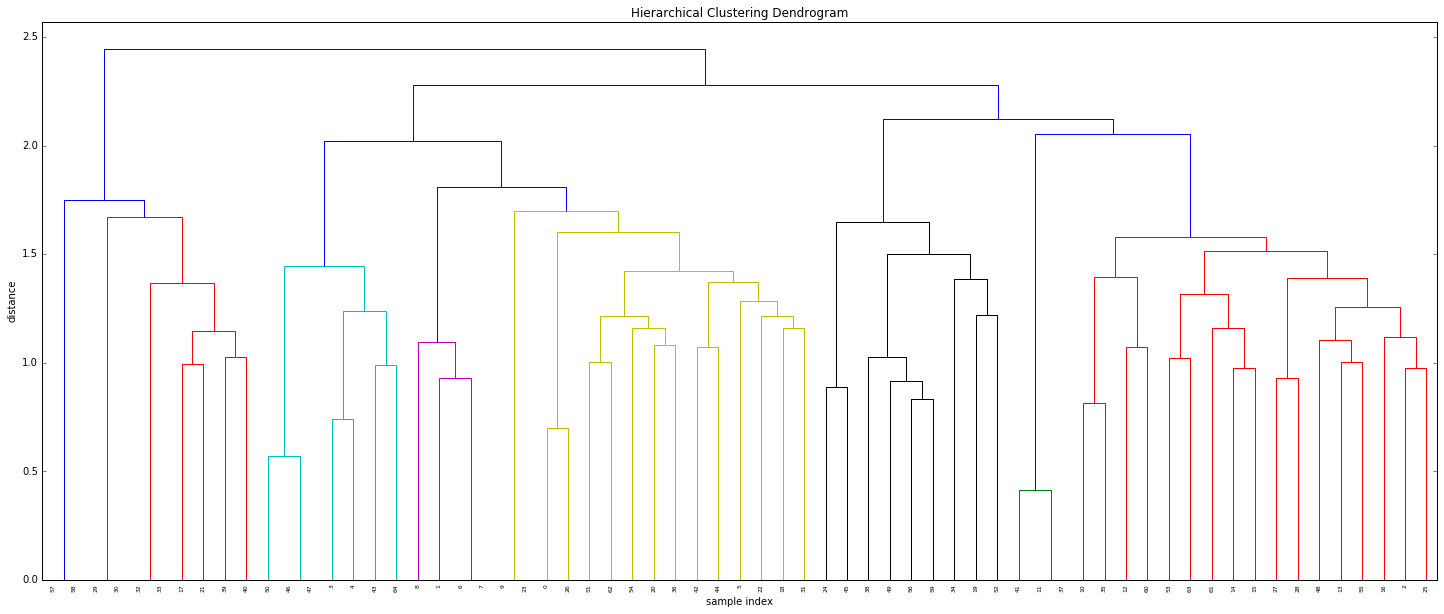

In [114]:
data["tfidf_class"] = hierarchycal_clustering(transformed_data, 7)

In [92]:
def print_clusters(type):
    for i in range(1,8):
        print(list(data[data[type] == i]["Название"]))

In [98]:
print_clusters("tfidf_class")

['Дополнительные главы теории алгоритмов', 'Коды с исправлением ошибок', 'Машинное обучение 1', 'Машинное обучение 2', 'Машинное обучение на больших данных', 'Машинное обучение на больших данных', 'Научно-исследовательский семинар "Распределённые системы"', 'Научно-исследовательский семинар "Теоретическая информатика"', 'Теория вычислений', 'Теория вычислений']
['Алгоритмы и структуры данных', 'Алгоритмы и структуры данных-2', 'Основы и методология программирования', 'Параллельное и распределенное программирование', 'Параллельные и распределённые вычисления', 'Программирование на графических процессорах', 'Языки разработки программного обеспечения']
['Академическое письмо на английском языке', 'Английский язык', 'Английский язык', 'Английский язык для начинающих']
['Автоматическая обработка текстов', 'Анализ и верификация алгоритмов для систем биржевой торговли', 'Архитектура компьютера и операционные системы', 'Artificial Intelligence in Video Games', 'История', 'Combinatorics, Graphs

In [106]:
kek = pd.DataFrame()

In [123]:
def get_clusters(type):
    clusters = []
    for i in range(1,8):
        clusters.append(list(data[data[type] == i]["Название"]))    
    return clusters

In [130]:
clusters = get_clusters("tfidf_class")
i = 0
for cluster in clusters:
    i += 1
    print("Cluster " + str(i) + ": ", ", ".join(cluster))
    print()

Cluster 1:  Дополнительные главы теории алгоритмов, Коды с исправлением ошибок, Машинное обучение 1, Машинное обучение 2, Машинное обучение на больших данных, Машинное обучение на больших данных, Научно-исследовательский семинар "Распределённые системы", Научно-исследовательский семинар "Теоретическая информатика", Теория вычислений, Теория вычислений

Cluster 2:  Алгоритмы и структуры данных, Алгоритмы и структуры данных-2, Основы и методология программирования, Параллельное и распределенное программирование, Параллельные и распределённые вычисления, Программирование на графических процессорах, Языки разработки программного обеспечения

Cluster 3:  Академическое письмо на английском языке, Английский язык, Английский язык, Английский язык для начинающих

Cluster 4:  Автоматическая обработка текстов, Анализ и верификация алгоритмов для систем биржевой торговли, Архитектура компьютера и операционные системы, Artificial Intelligence in Video Games, История, Combinatorics, Graphs and Comp

In [125]:
print"Cluster " + str(i) for i in range(8)
for i in range(17):
    for j in range(8):
        

10
7
4
15
9
3
17


### LDA

In [131]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=10, max_iter=5,
                                learning_method='online',)

In [132]:
lda_data = lda.fit_transform(transformed_data)

[[  6.00000000e+00   7.00000000e+00   0.00000000e+00   2.00000000e+00]
 [  9.00000000e+00   2.30000000e+01   0.00000000e+00   2.00000000e+00]
 [  1.10000000e+01   3.70000000e+01   0.00000000e+00   2.00000000e+00]
 [  2.90000000e+01   3.00000000e+01   0.00000000e+00   2.00000000e+00]
 [  3.20000000e+01   3.30000000e+01   0.00000000e+00   2.00000000e+00]
 [  4.60000000e+01   4.70000000e+01   0.00000000e+00   2.00000000e+00]
 [  5.70000000e+01   5.80000000e+01   0.00000000e+00   2.00000000e+00]
 [  1.00000000e+00   1.50000000e+01   4.42436471e-06   2.00000000e+00]
 [  5.90000000e+01   6.30000000e+01   2.36818667e-05   2.00000000e+00]
 [  6.70000000e+01   7.20000000e+01   5.00063262e-05   4.00000000e+00]
 [  2.00000000e+01   4.20000000e+01   6.69016283e-05   2.00000000e+00]
 [  1.00000000e+01   3.60000000e+01   7.63549342e-05   2.00000000e+00]
 [  2.00000000e+00   6.80000000e+01   9.55434893e-05   3.00000000e+00]
 [  5.50000000e+01   6.00000000e+01   9.82455621e-05   2.00000000e+00]
 [  3.

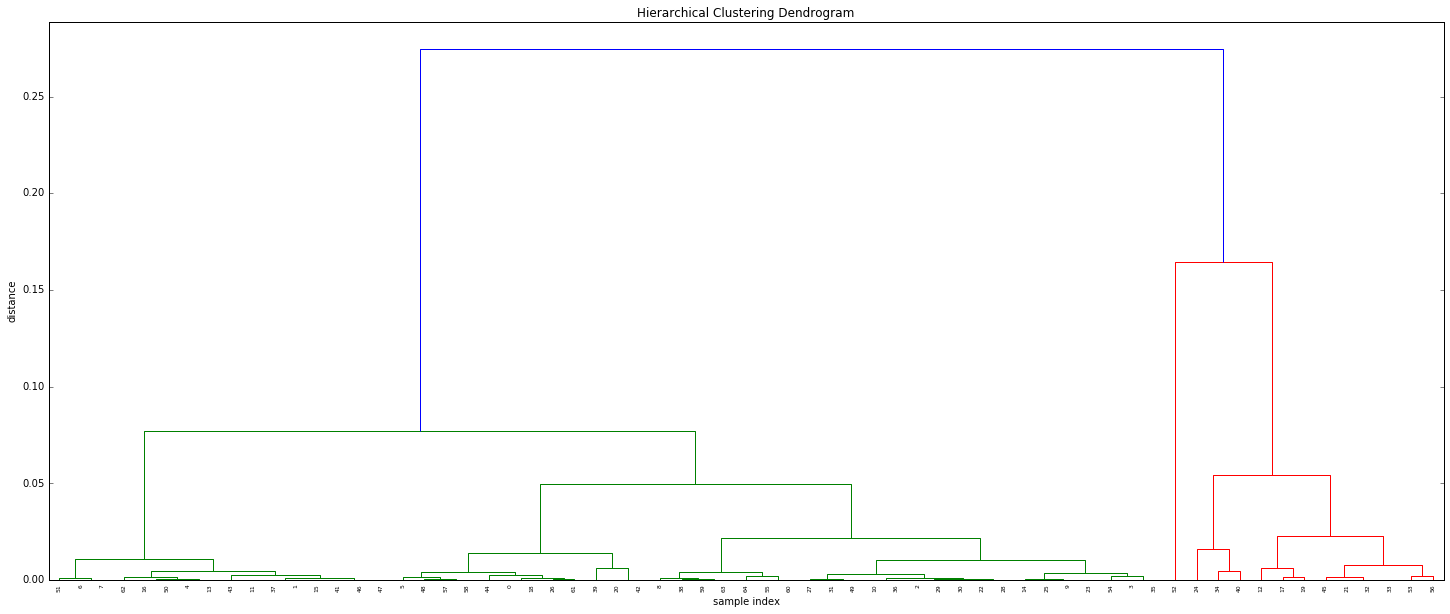

In [136]:
data["lda"] = hierarchycal_clustering(lda_data, 7)

In [134]:
print_clusters("lda")

ValueError: Length of values does not match length of index

In [137]:
clusters = get_clusters("lda")
i = 0
for cluster in clusters:
    i += 1
    print("Cluster " + str(i) + ": ", ", ".join(cluster))
    print()

Cluster 1:  Академическое письмо на английском языке, Алгоритмы и структуры данных-2, Английский язык, Английский язык, Вводный научно-исследовательский семинар, Временные ряды, Дискретная математика 2, Дифференциальные уравнения, Научно-исследовательский семинар "Машинное обучение и приложения", Научный семинар, Основы и методология программирования, Параллельное и распределенное программирование, Параллельные и распределённые вычисления, Программирование на графических процессорах, Психология в ИТ, Философия науки

Cluster 2:  Автоматическая обработка текстов, Анализ и верификация алгоритмов для систем биржевой торговли, Artificial Intelligence in Video Games, История, Майнинг текстов, Научно-исследовательский семинар "Распределённые системы", Core Concepts in Data Analysis, Foundations of Machine Learning and Data Mining, Прикладной статистический анализ данных, Теория вычислений, Теория вычислений, Теория чисел и её приложения

Cluster 3:  Алгебра, Алгоритмы и структуры данных, Анг

In [80]:
data[data["Название"] == 'Машинное обучение на больших данных']

,Образовательная программа,Направление,Text,Авторы,Кто читает,id,Когда читается,Преподаватели,Язык,Где читается,Уровень,Кредитов,Название,Статус,Прогр. уч. дисц.,tfidf_class,lda
34,Прикладная математика и информатика,01.03.02. Прикладная математика и информатика,Национальный исследовательский университет «Вы...,NaN,Департамент больших данных и информационного п...,35,"3-й курс, 4 модуль","['Бартунов Сергей Олегович', 'Папулин Сергей Ю...",русский,Факультет компьютерных наук,Бакалавриат,3.0,Машинное обучение на больших данных,Курс по выбору,/data/2016/10/30/1117093534/program-1509926217...,1,6
35,Прикладная математика и информатика,01.03.02. Прикладная математика и информатика,Национальный исследовательский университет «Вы...,NaN,Департамент больших данных и информационного п...,36,"3-й курс, 4 модуль","['Папулин Сергей Юрьевич', 'Умнов Алексей Вита...",русский,Факультет компьютерных наук,Бакалавриат,3.0,Машинное обучение на больших данных,Курс по выбору,/data/2016/10/30/1117093530/program-1546015286...,1,6


In [60]:
from w3lib.html import remove_tags
from tqdm import tqdm, tqdm_notebook
import pandas as pd
import os
current
tqdm.pandas(tqdm_notebook)
df = pd.read_json("howpop_train.jsonlines", lines=True)
df['text'] = df['content'].progress_apply(remove_tags)

OSError: [Errno 22] Invalid argument

In [6]:
f = open("howpop_train.jsonlines", "r")

In [49]:
import networkx as nx
G = nx.Graph()

In [54]:
G.add_nodes_from(["Привет", "кек", "лол"], color = "blue")

In [57]:
G.add_edges_from([("Привет", "кек"), ("кек", "лол")], color = "blue")

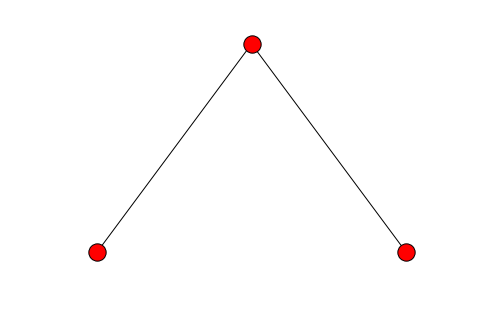

In [58]:
nx.draw_spectral(G)